In [1]:
# KEPLER EXOPLANET - EDA
# Tarih: 2025-11-11

import sys
from pathlib import Path

# Proje kökünü path'e ekle
PROJECT_ROOT = Path().absolute().parent
sys.path.insert(0, str(PROJECT_ROOT))

# Kütüphaneler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Proje modülleri
from src.core import DATA_RAW, TARGET_COLUMN

# Ayarlar
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-darkgrid')

print("✅ Setup tamamlandı!")
print(f"📂 Proje kökü: {PROJECT_ROOT}")

✅ Setup tamamlandı!
📂 Proje kökü: /home/ozturu68/Projeler/kepler-new


In [2]:
# VERİ YÜKLEME
data_file = DATA_RAW / "kepler_koi.csv"

print(f"📂 Dosya: {data_file}")
print(f"📏 Boyut: {data_file.stat().st_size / (1024*1024):.2f} MB")
print()

print("📥 Veri yükleniyor...")
df = pd.read_csv(data_file, low_memory=False)

print(f"✅ Veri yüklendi!")
print(f"   Satır: {len(df):,}")
print(f"   Sütun: {len(df.columns)}")
print(f"   Memory: {df.memory_usage(deep=True).sum() / (1024*1024):.2f} MB")

📂 Dosya: /home/ozturu68/Projeler/kepler-new/data/raw/kepler_koi.csv
📏 Boyut: 10.87 MB

📥 Veri yükleniyor...
✅ Veri yüklendi!
   Satır: 9,564
   Sütun: 153
   Memory: 23.41 MB


In [3]:
# İLK 5 SATIR
print("🔍 İlk 5 satır:")
df.head()

🔍 İlk 5 satır:


,kepid,kepoi_name,kepler_name,ra,ra_err,ra_str,dec,dec_err,dec_str,koi_gmag,koi_gmag_err,koi_rmag,koi_rmag_err,koi_imag,koi_imag_err,koi_zmag,koi_zmag_err,koi_jmag,koi_jmag_err,koi_hmag,koi_hmag_err,koi_kmag,koi_kmag_err,koi_kepmag,koi_kepmag_err,koi_delivname,koi_vet_stat,koi_quarters,koi_disposition,koi_pdisposition,koi_count,koi_num_transits,koi_max_sngle_ev,koi_max_mult_ev,koi_bin_oedp_sig,koi_limbdark_mod,koi_ldm_coeff4,koi_ldm_coeff3,koi_ldm_coeff2,koi_ldm_coeff1,koi_trans_mod,koi_model_snr,koi_model_dof,koi_model_chisq,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_eccen,koi_eccen_err1,koi_eccen_err2,koi_longp,koi_longp_err1,koi_longp_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_sma,koi_sma_err1,koi_sma_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_ingress,koi_ingress_err1,koi_ingress_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_period,koi_period_err1,koi_period_err2,koi_ror,koi_ror_err1,koi_ror_err2,koi_dor,koi_dor_err1,koi_dor_err2,koi_incl,koi_incl_err1,koi_incl_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_smet,koi_smet_err1,koi_smet_err2,koi_srad,koi_srad_err1,koi_srad_err2,koi_smass,koi_smass_err1,koi_smass_err2,koi_sage,koi_sage_err1,koi_sage_err2,koi_sparprov,koi_fwm_stat_sig,koi_fwm_sra,koi_fwm_sra_err,koi_fwm_sdec,koi_fwm_sdec_err,koi_fwm_srao,koi_fwm_srao_err,koi_fwm_sdeco,koi_fwm_sdeco_err,koi_fwm_prao,koi_fwm_prao_err,koi_fwm_pdeco,koi_fwm_pdeco_err,koi_dicco_mra,koi_dicco_mra_err,koi_dicco_mdec,koi_dicco_mdec_err,koi_dicco_msky,koi_dicco_msky_err,koi_dikco_mra,koi_dikco_mra_err,koi_dikco_mdec,koi_dikco_mdec_err,koi_dikco_msky,koi_dikco_msky_err,koi_comment,koi_vet_date,koi_tce_plnt_num,koi_tce_delivname,koi_datalink_dvs,koi_disp_prov,koi_parm_prov,koi_time0,koi_time0_err1,koi_time0_err2,koi_datalink_dvr,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_insol,koi_insol_err1,koi_insol_err2,koi_srho,koi_srho_err1,koi_srho_err2,koi_fittype,koi_score
0,10797460,K00752.01,Kepler-227 b,291.93423,0.0,19h27m44.22s,48.141651,0.0,+48d08m29.9s,15.890,NaN,15.270,NaN,15.114,NaN,15.006,NaN,14.082,0.025,13.751,0.030,13.648,0.054,15.347,NaN,cumulative,Done,11111111111111111000000000000000,CONFIRMED,CANDIDATE,2,142.0,5.135849,28.470820,0.6864,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2291,0.4603,Mandel and Agol (2002 ApJ 580 171),35.8,NaN,NaN,170.538750,0.002160,-0.002160,0.0,NaN,NaN,NaN,NaN,NaN,2.26,0.26,-0.15,0.0853,NaN,NaN,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,NaN,NaN,NaN,615.8,19.5,-19.5,9.488036,2.775000e-05,-2.775000e-05,0.022344,0.000832,-0.000528,24.810,2.600,-2.600,89.66,NaN,NaN,793.0,NaN,NaN,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.14,0.15,-0.15,0.927,0.105,-0.061,0.919,0.052,-0.046,NaN,NaN,NaN,q1_q17_dr25_stellar,0.002,19.462294,1.400000e-05,48.14191,0.000130,0.430,0.510,0.940,0.480,-0.00020,0.00032,-0.00055,0.00031,-0.010,0.130,0.200,0.160,0.200,0.170,0.080,0.130,0.310,0.170,0.320,0.160,NO_COMMENT,2018-08-16,1.0,q1_q17_dr25_tce,010/010797/010797460/dv/kplr010797460-001-2016...,q1_q17_dr25_sup_koi,q1_q17_dr25_koi,2455003.539,0.002160,-0.002160,010/010797/010797460/dv/kplr010797460-20160209...,0,0,0,0,93.59,29.45,-16.65,3.20796,0.33173,-1.09986,LS+MCMC,1.000
1,10797460,K00752.02,Kepler-227 c,291.93423,0.0,19h27m44.22s,48.141651,0.0,+48d08m29.9s,15.890,NaN,15.270,NaN,15.114,NaN,15.006,NaN,14.082,0.025,13.751,0.030,13.648,0.054,15.347,NaN,cumulative,Done,11111111111111111000000000000000,CONFIRMED,CANDIDATE,2,25.0,7.027669,20.109507,0.0023,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2291,0.4603,Mandel and Agol (2002 ApJ 580 171),25.8,NaN,NaN,162.513840,0.003520,-0.003520,0.0,NaN,NaN,NaN,NaN,NaN,2.83,0.32,-0.19,0.2734,NaN,NaN,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,NaN,NaN,NaN,874.8,35.5,-35.5,54.418383,2.479000e-04,-2.479000e-04,0.027954,0.009078,-0.001347,77.900,28.400,-28.400,89.57,NaN,NaN,443.0,NaN,NaN,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.14,0.15,-0.15,0.

🎯 Target Sütunu: koi_disposition

📊 Dağılım:
   FALSE POSITIVE      :  4839 ( 50.6%)
   CONFIRMED           :  2746 ( 28.7%)
   CANDIDATE           :  1979 ( 20.7%)


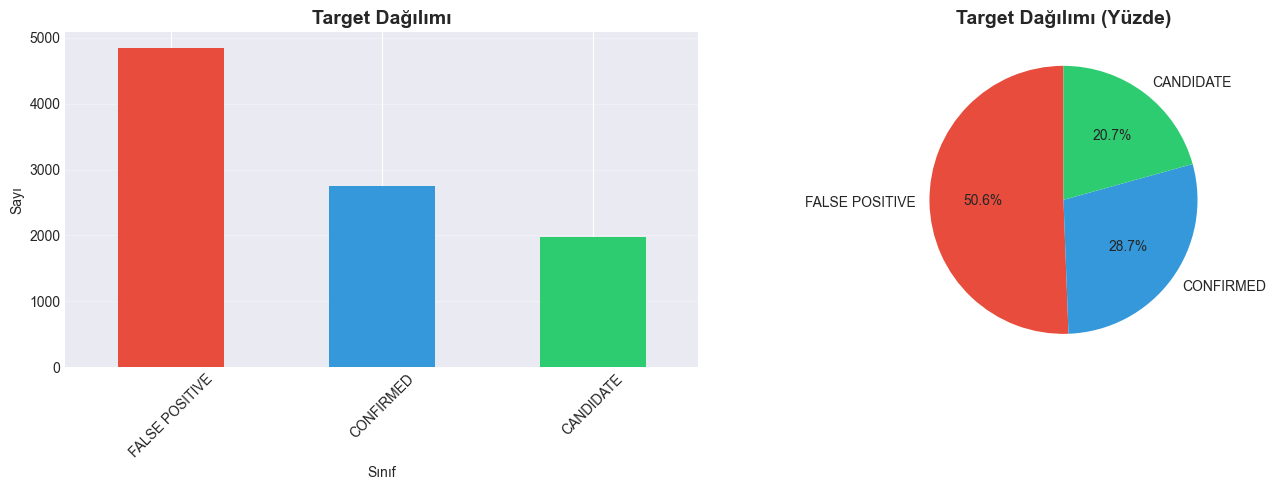

In [4]:
# TARGET DAĞILIMI
import numpy as np

print(f"🎯 Target Sütunu: {TARGET_COLUMN}\n")

target_counts = df[TARGET_COLUMN].value_counts()
target_pct = df[TARGET_COLUMN].value_counts(normalize=True) * 100

print("📊 Dağılım:")
for value, count in target_counts.items():
    pct = target_pct[value]
    print(f"   {value:20s}: {count:5d} ({pct:5.1f}%)")

# GRAFİK
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
target_counts.plot(kind='bar', ax=axes[0], color=['#e74c3c', '#3498db', '#2ecc71'])
axes[0].set_title('Target Dağılımı', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Sınıf')
axes[0].set_ylabel('Sayı')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# Pie chart
axes[1].pie(target_counts, labels=target_counts.index, autopct='%1.1f%%',
            colors=['#e74c3c', '#3498db', '#2ecc71'], startangle=90)
axes[1].set_title('Target Dağılımı (Yüzde)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

In [5]:
# MISSING VALUES
print("🔍 Eksik Değer Analizi\n")

total_cells = np.product(df.shape)
total_missing = df.isnull().sum().sum()
missing_pct = (total_missing / total_cells) * 100

print(f"📊 Genel Durum:")
print(f"   Toplam hücre: {total_cells:,}")
print(f"   Eksik hücre:  {total_missing:,} ({missing_pct:.1f}%)")
print()

# En çok eksik olan 10 sütun
missing_df = pd.DataFrame({
    'column': df.columns,
    'missing_count': df.isnull().sum(),
    'missing_pct': (df.isnull().sum() / len(df)) * 100
})
missing_df = missing_df[missing_df['missing_count'] > 0].sort_values('missing_pct', ascending=False)

print(f"📋 En çok eksik olan 10 sütun:\n")
print(missing_df.head(10).to_string(index=False))

🔍 Eksik Değer Analizi

📊 Genel Durum:
   Toplam hücre: 1,463,292
   Eksik hücre:  285,294 (19.5%)

📋 En çok eksik olan 10 sütun:

          column  missing_count  missing_pct
   koi_incl_err1           9564        100.0
koi_ingress_err2           9564        100.0
  koi_eccen_err1           9564        100.0
  koi_eccen_err2           9564        100.0
       koi_longp           9564        100.0
  koi_longp_err1           9564        100.0
  koi_longp_err2           9564        100.0
    koi_sma_err1           9564        100.0
    koi_sma_err2           9564        100.0
  koi_kepmag_err           9564        100.0


In [6]:
# SAYISAL ÖZELLİKLER - İSTATİSTİKLER
print("📊 Sayısal Özellikler - İstatistiksel Özet\n")

# Sayısal sütunları al
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
print(f"✅ Sayısal sütun sayısı: {len(numerical_cols)}")
print()

# İlk 15 sütunun istatistikleri
stats_df = df[numerical_cols[:15]].describe().T
stats_df['missing'] = df[numerical_cols[:15]].isnull().sum()
stats_df['missing_pct'] = (stats_df['missing'] / len(df)) * 100

print("📈 İlk 15 Sayısal Sütun İstatistikleri:")
stats_df.round(4)

📊 Sayısal Özellikler - İstatistiksel Özet

✅ Sayısal sütun sayısı: 133

📈 İlk 15 Sayısal Sütun İstatistikleri:


,count,mean,std,min,25%,50%,75%,max,missing,missing_pct
kepid,9564.0,7.690628e+06,2.653459e+06,757450.0000,5.556034e+06,7.906892e+06,9.873066e+06,1.293514e+07,0,0.0000
ra,9564.0,2.920602e+02,4.766700e+00,279.8527,2.886608e+02,2.922611e+02,2.958592e+02,3.017208e+02,0,0.0000
ra_err,9564.0,0.000000e+00,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0.0000
dec,9564.0,4.381040e+01,3.601200e+00,36.5774,4.077720e+01,4.367750e+01,4.671460e+01,5.233600e+01,0,0.0000
dec_err,9564.0,0.000000e+00,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0.0000
koi_gmag,9523.0,1.483050e+01,1.501900e+00,7.2250,1.389650e+01,1.506400e+01,1.593550e+01,2.115000e+01,41,0.4287
koi_gmag_err,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9564,100.0000
koi_rmag,9555.0,1.422160e+01,1.383700e+00,7.1010,1.339300e+01,1.447100e+01,1.527500e+01,1.996000e+01,9,0.0941
koi_rmag_err,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9564,100.0000
koi_imag,9410.0,1.407510e+01,1.292600e+00,7.6270,1.329400e+01,1.431750e+01,1.506300e+01,1.990000e+01,154,1.6102


📊 Feature Dağılımları (İlk 6 Sayısal Sütun)



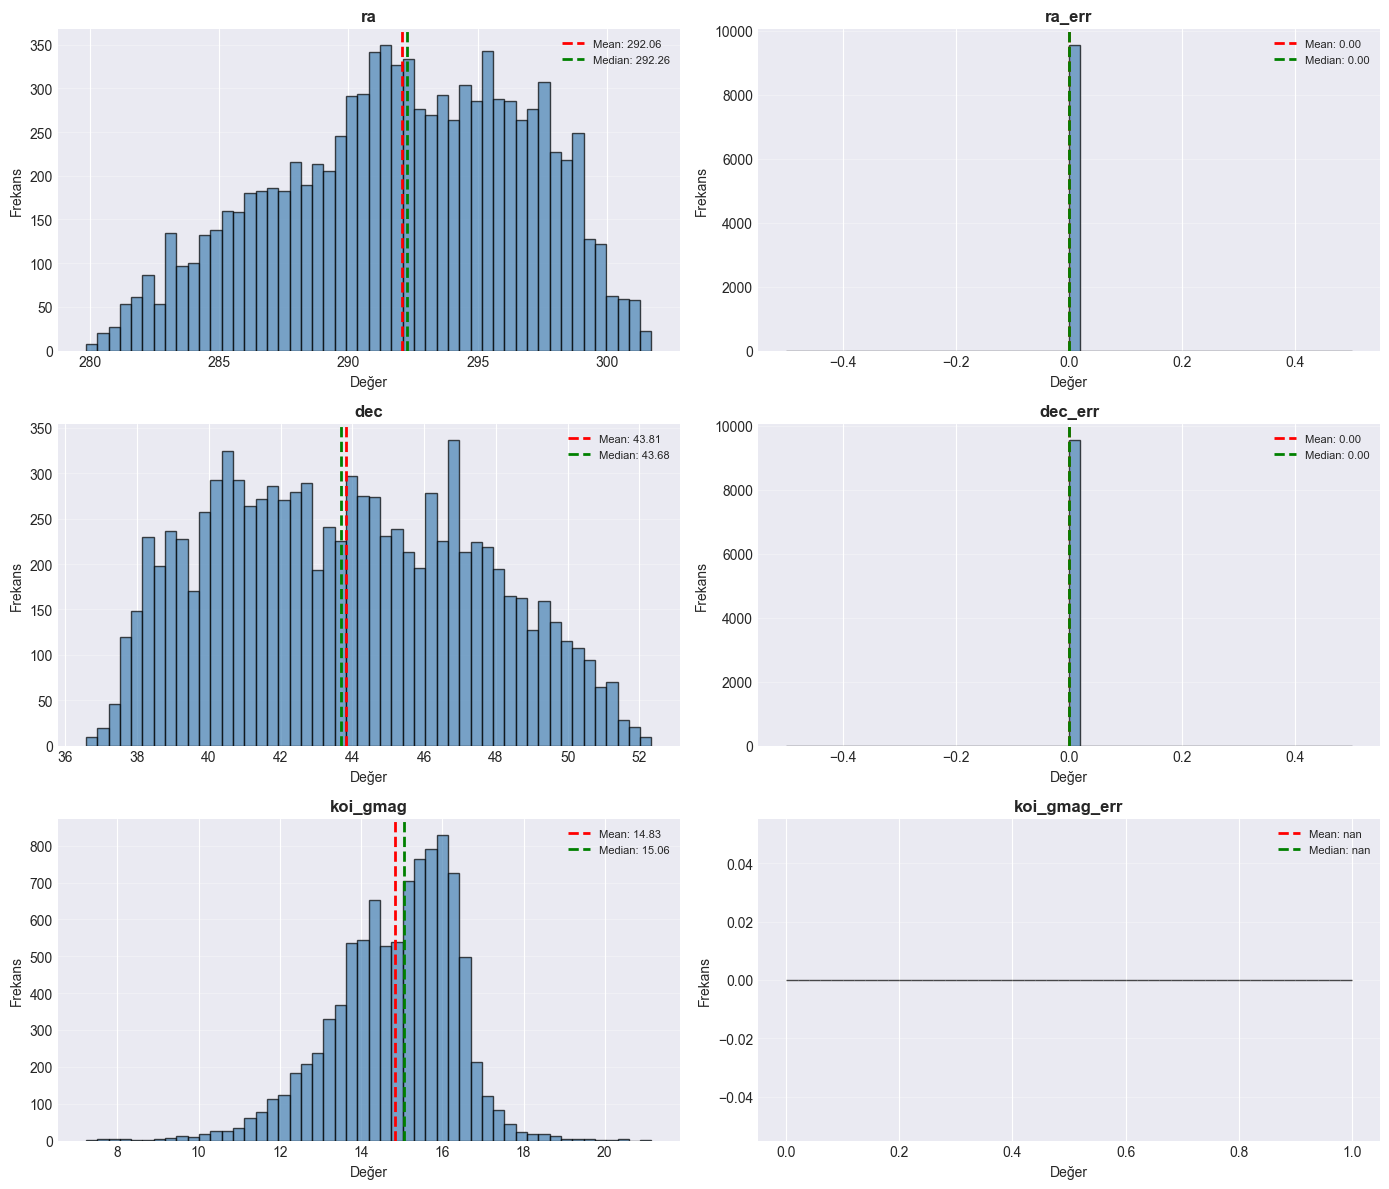

✅ Grafikler oluşturuldu!


In [7]:
# FEATURE DAĞILIMLARI - İLK 6 FEATURE
print("📊 Feature Dağılımları (İlk 6 Sayısal Sütun)\n")

# İlk 6 sayısal feature
features_to_plot = numerical_cols[1:7]  # 0'ıncı genelde ID olur, atlıyoruz

fig, axes = plt.subplots(3, 2, figsize=(14, 12))
axes = axes.flatten()

for i, col in enumerate(features_to_plot):
    data = df[col].dropna()
    
    # Histogram
    axes[i].hist(data, bins=50, alpha=0.7, color='steelblue', edgecolor='black')
    axes[i].set_title(f'{col}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Değer', fontsize=10)
    axes[i].set_ylabel('Frekans', fontsize=10)
    axes[i].grid(axis='y', alpha=0.3)
    
    # Mean ve Median çizgileri
    mean_val = data.mean()
    median_val = data.median()
    axes[i].axvline(mean_val, color='red', linestyle='--', linewidth=2, 
                    label=f'Mean: {mean_val:.2f}')
    axes[i].axvline(median_val, color='green', linestyle='--', linewidth=2, 
                    label=f'Median: {median_val:.2f}')
    axes[i].legend(fontsize=8)

plt.tight_layout()
plt.show()

print("✅ Grafikler oluşturuldu!")

📦 Boxplot Analizi - Outlier Tespiti



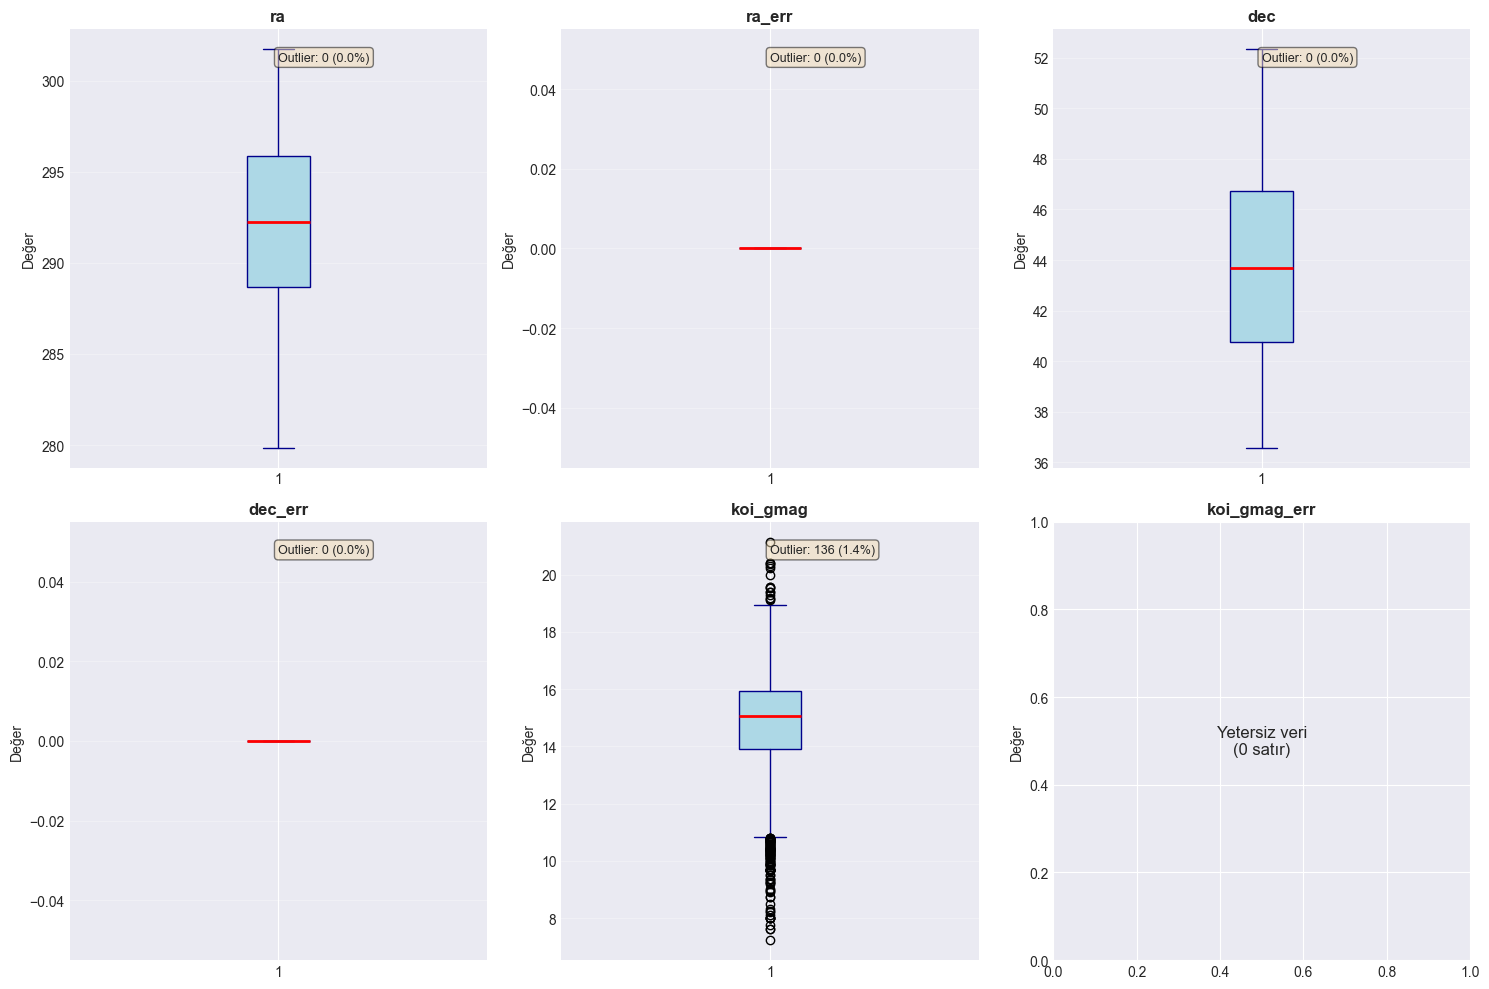

✅ Boxplot analizi tamamlandı!


In [9]:
# BOXPLOT - OUTLIER TESPİTİ
print("📦 Boxplot Analizi - Outlier Tespiti\n")

features_to_plot = numerical_cols[1:7]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(features_to_plot):
    data = df[col].dropna()
    
    # Eğer veri boşsa veya çok az veri varsa atla
    if len(data) < 10:
        axes[i].text(0.5, 0.5, f'Yetersiz veri\n({len(data)} satır)', 
                     ha='center', va='center', fontsize=12,
                     transform=axes[i].transAxes)
        axes[i].set_title(f'{col}', fontsize=12, fontweight='bold')
        axes[i].set_ylabel('Değer', fontsize=10)
        continue
    
    # Boxplot
    bp = axes[i].boxplot(data, vert=True, patch_artist=True,
                         boxprops=dict(facecolor='lightblue', color='darkblue'),
                         whiskerprops=dict(color='darkblue'),
                         capprops=dict(color='darkblue'),
                         medianprops=dict(color='red', linewidth=2))
    
    axes[i].set_title(f'{col}', fontsize=12, fontweight='bold')
    axes[i].set_ylabel('Değer', fontsize=10)
    axes[i].grid(axis='y', alpha=0.3)
    
    # Outlier sayısı hesapla (IQR method)
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    # Sıfıra bölme kontrolü
    if len(data) > 0:
        outlier_pct = (len(outliers) / len(data)) * 100
    else:
        outlier_pct = 0
    
    # Outlier bilgisi ekle
    axes[i].text(0.5, 0.95, f'Outlier: {len(outliers)} ({outlier_pct:.1f}%)',
                 transform=axes[i].transAxes, fontsize=9,
                 verticalalignment='top', 
                 bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

print("✅ Boxplot analizi tamamlandı!")

🔗 Korelasyon Matrisi



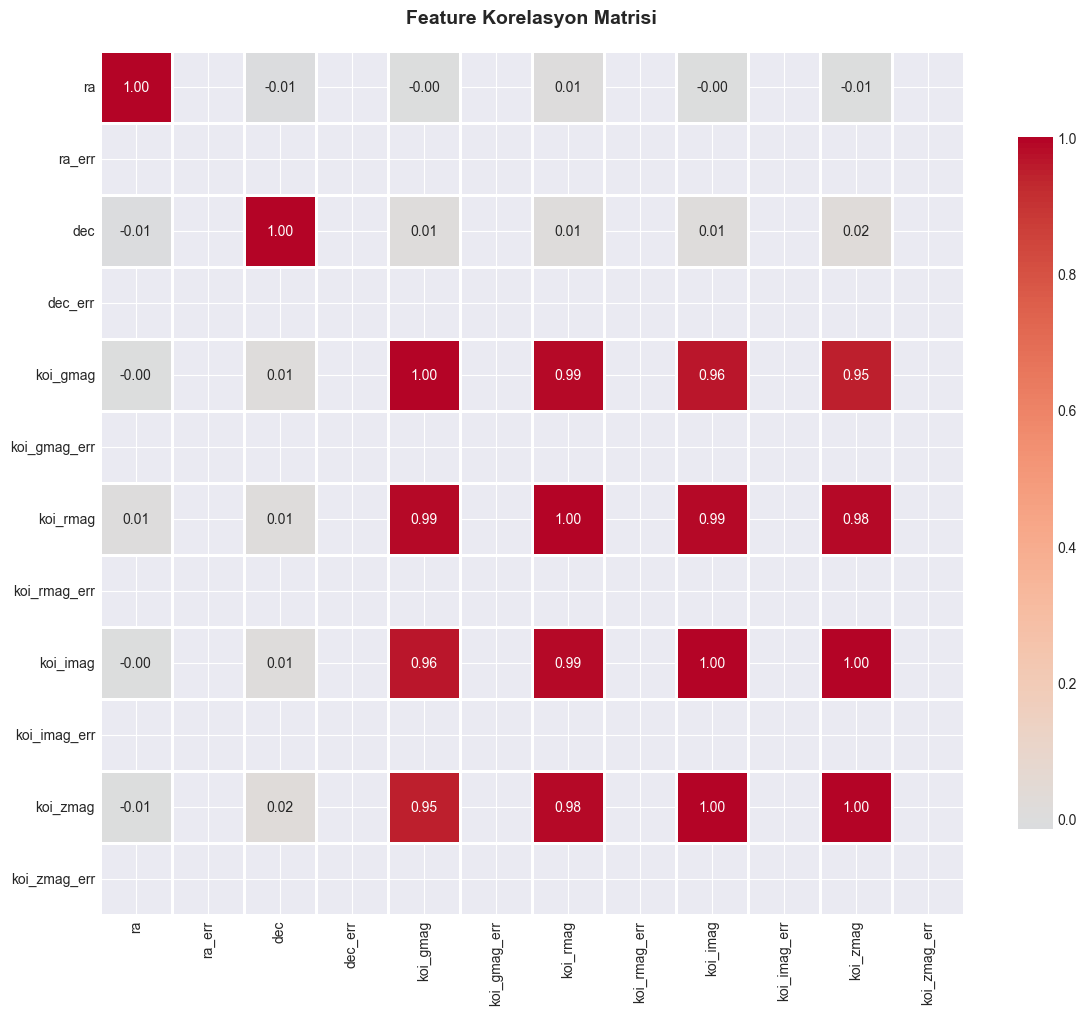


⚠️  Yüksek Korelasyonlar (>0.8):
   koi_gmag <-> koi_rmag: 0.986
   koi_gmag <-> koi_imag: 0.961
   koi_gmag <-> koi_zmag: 0.948
   koi_rmag <-> koi_imag: 0.990
   koi_rmag <-> koi_zmag: 0.985
   koi_imag <-> koi_zmag: 0.997

✅ Korelasyon analizi tamamlandı!


In [10]:
# KORELASYON MATRİSİ
print("🔗 Korelasyon Matrisi\n")

# İlk 12 sayısal feature al (çok fazla olmasın)
features_to_correlate = numerical_cols[1:13]
corr_df = df[features_to_correlate].corr()

# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_df, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Korelasyon Matrisi', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Yüksek korelasyonlar (>0.8)
print("\n⚠️  Yüksek Korelasyonlar (>0.8):")
high_corr = []
for i in range(len(corr_df.columns)):
    for j in range(i+1, len(corr_df.columns)):
        if abs(corr_df.iloc[i, j]) > 0.8:
            high_corr.append((corr_df.columns[i], corr_df.columns[j], corr_df.iloc[i, j]))

if high_corr:
    for feat1, feat2, corr_val in high_corr:
        print(f"   {feat1} <-> {feat2}: {corr_val:.3f}")
else:
    print("   ✓ Yüksek korelasyon yok (iyi haber!)")

print("\n✅ Korelasyon analizi tamamlandı!")

🎯 Target'a Göre Feature Dağılımları



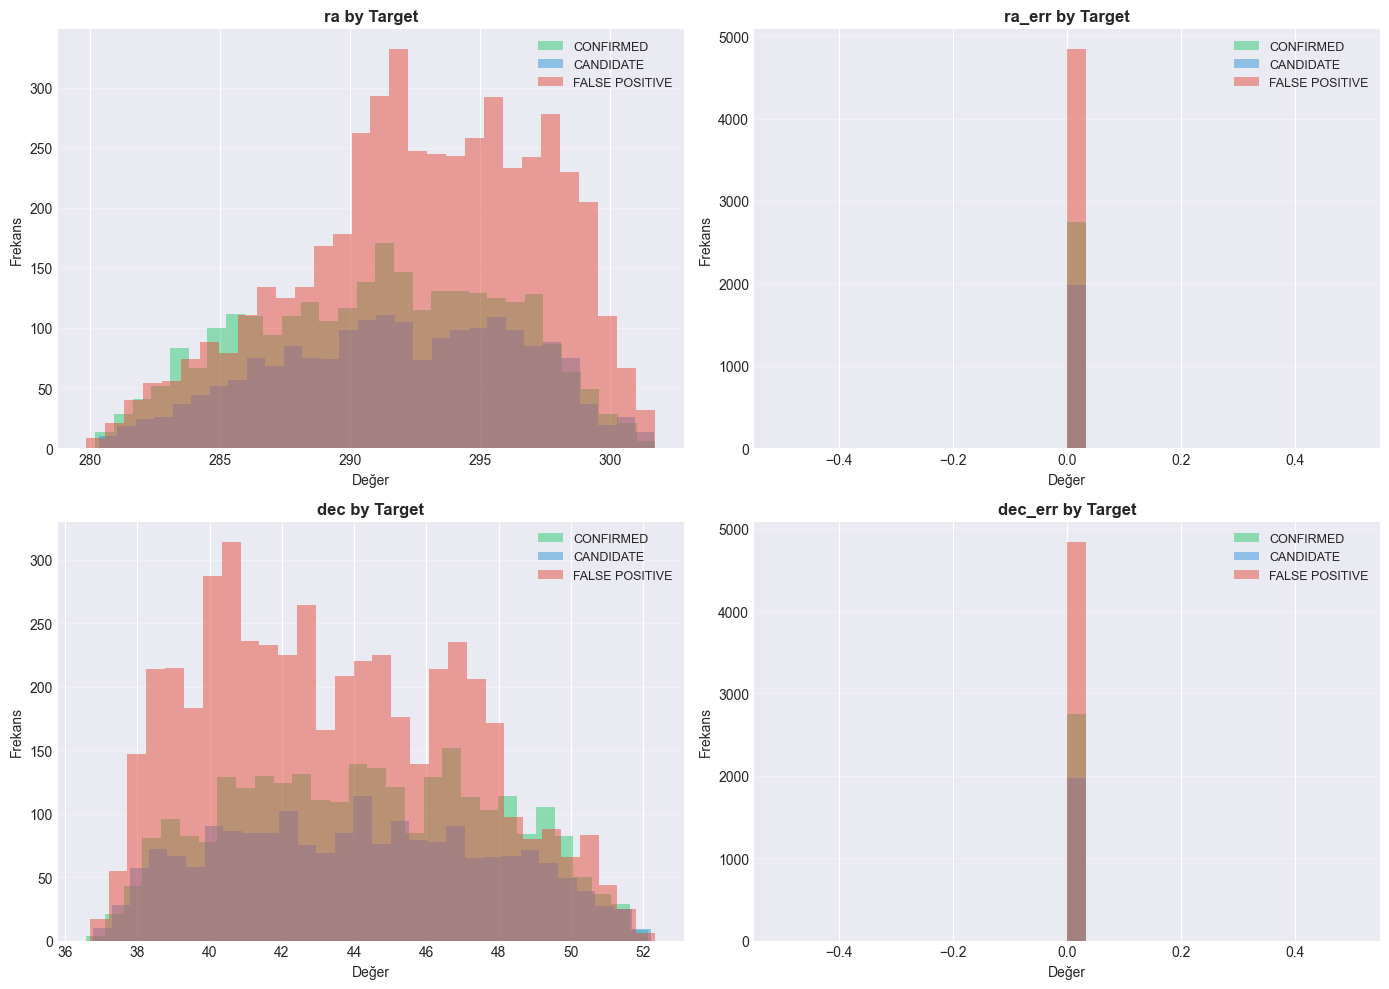

✅ Target karşılaştırması tamamlandı!


In [11]:
# TARGET vs FEATURES
print("🎯 Target'a Göre Feature Dağılımları\n")

# İlk 4 feature al
features_to_plot = numerical_cols[1:5]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# Her target sınıfı için farklı renk
colors = {'FALSE POSITIVE': '#e74c3c', 'CONFIRMED': '#2ecc71', 'CANDIDATE': '#3498db'}

for i, col in enumerate(features_to_plot):
    for target_class in df[TARGET_COLUMN].unique():
        if pd.notna(target_class):  # NaN kontrolü
            data = df[df[TARGET_COLUMN] == target_class][col].dropna()
            if len(data) > 0:  # Boş veri kontrolü
                axes[i].hist(data, bins=30, alpha=0.5, 
                            label=target_class, 
                            color=colors.get(target_class, 'gray'))
    
    axes[i].set_title(f'{col} by Target', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Değer', fontsize=10)
    axes[i].set_ylabel('Frekans', fontsize=10)
    axes[i].legend(fontsize=9)
    axes[i].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Target karşılaştırması tamamlandı!")

In [12]:
# SONUÇ VE ÖNERİLER
print("="*80)
print("📝 EDA SONUÇLARI VE ÖNERİLER")
print("="*80)

print("\n✅ TAMAMLANAN ANALİZLER:")
print("   1. ✓ Veri yükleme ve genel bakış")
print("   2. ✓ Target dağılımı analizi")
print("   3. ✓ Missing values analizi")
print("   4. ✓ Numerical features istatistikleri")
print("   5. ✓ Feature dağılımları (histogram)")
print("   6. ✓ Outlier detection (boxplot)")
print("   7. ✓ Korelasyon analizi (heatmap)")
print("   8. ✓ Target vs features karşılaştırması")

print("\n⚠️  ÖNEMLİ BULGULAR:")
print(f"   • Dataset dengesiz (imbalanced):")
target_dist = df[TARGET_COLUMN].value_counts(normalize=True) * 100
for cls, pct in target_dist.items():
    print(f"     - {cls}: %{pct:.1f}")
    
total_missing_pct = (df.isnull().sum().sum() / np.product(df.shape)) * 100
print(f"   • Missing values: %{total_missing_pct:.1f}")
print(f"   • Toplam {len(df):,} satır, {len(df.columns)} sütun")
print(f"   • {len(numerical_cols)} sayısal feature mevcut")

print("\n🔧 SONRAKI ADIMLAR:")
print("   1. Feature Engineering:")
print("      - Missing value imputation (median/mode)")
print("      - Outlier handling (IQR method veya Robust scaling)")
print("      - Feature scaling (RobustScaler önerilir)")
print("      - Polynomial features oluşturma (degree=2)")
print("   ")
print("   2. Feature Selection:")
print("      - Correlation threshold (>0.95 drop)")
print("      - Tree-based importance (CatBoost)")
print("      - Recursive Feature Elimination")
print("   ")
print("   3. Class Imbalance Çözümü:")
print("      - SMOTE uygulaması (oversampling)")
print("      - Class weights kullanımı")
print("      - Stratified K-Fold CV")
print("   ")
print("   4. Model Training:")
print("      - CatBoost, LightGBM, XGBoost")
print("      - 5-Fold Cross-validation")
print("      - Hyperparameter tuning (Optuna)")

print("\n" + "="*80)
print("🎉 EDA TAMAMLANDI!")
print("="*80)
print("\n📅 Tarih: 2025-11-11")
print("👤 Yazar: sulegogh / ozturu68")
print("📊 Notebook: 01_exploratory_data_analysis.ipynb")
print("\n🚀 Sonraki: 02_feature_engineering_research.ipynb")

📝 EDA SONUÇLARI VE ÖNERİLER

✅ TAMAMLANAN ANALİZLER:
   1. ✓ Veri yükleme ve genel bakış
   2. ✓ Target dağılımı analizi
   3. ✓ Missing values analizi
   4. ✓ Numerical features istatistikleri
   5. ✓ Feature dağılımları (histogram)
   6. ✓ Outlier detection (boxplot)
   7. ✓ Korelasyon analizi (heatmap)
   8. ✓ Target vs features karşılaştırması

⚠️  ÖNEMLİ BULGULAR:
   • Dataset dengesiz (imbalanced):
     - FALSE POSITIVE: %50.6
     - CONFIRMED: %28.7
     - CANDIDATE: %20.7
   • Missing values: %19.5
   • Toplam 9,564 satır, 153 sütun
   • 133 sayısal feature mevcut

🔧 SONRAKI ADIMLAR:
   1. Feature Engineering:
      - Missing value imputation (median/mode)
      - Outlier handling (IQR method veya Robust scaling)
      - Feature scaling (RobustScaler önerilir)
      - Polynomial features oluşturma (degree=2)
   
   2. Feature Selection:
      - Correlation threshold (>0.95 drop)
      - Tree-based importance (CatBoost)
      - Recursive Feature Elimination
   
   3. Class Imbal